<a href="https://colab.research.google.com/github/Amaranth32/YOLOFinal/blob/main/ground10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import kagglehub
path = kagglehub.dataset_download("swish9/weeds-detection")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'weeds-detection' dataset.
Path to dataset files: /kaggle/input/weeds-detection


In [4]:
!pip install ultralytics

from ultralytics import YOLO

In [6]:
# creating yaml file to make new model
# this is an attempt at creating my own model

import yaml

trainPath = '/kaggle/input/weeds-detection/dataset/images/train'
validPath = '/kaggle/input/weeds-detection/dataset/images/val'
testPath = '/kaggle/input/weeds-detection/dataset/images/test'
Id = ['crop','weed'] #classes
numIds = 2 #number of classes
bs = -1

# modeled after the coco dataset file
data = {
  'train': trainPath,
  'val': validPath,
  'test': testPath,
  'nc': numIds,
  'names': Id
}

# creating the yaml file
with open('crew.yaml', 'w') as file:
  yaml.dump(data,file)

print("yaml file (crew.yaml) has been written")


yaml file (crew.yaml) has been written


In [16]:
# reference for code below (https://docs.ultralytics.com/tasks/detect/#models)
#this uses a pretrained model

#load a model
model = YOLO("yolo11n.yaml") #building a new model from yaml

#model = YOLO("yolo11n.pt") #loading a pretrained model
#model = YOLO("runs/detect/train/weights/best.pt")
# model = YOLO("yolo11n.yaml").load("yolo11n.pt") # build form yaml and transfer weights

In [ ]:
#train a model
results = model.train(data = "crew.yaml", epochs= 10 , batch = -1, imgsz= 1245, device = 0)
#device = 0

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=crew.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1245, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

In [11]:
metrics = model.val()
path = model.export(format="onnx")

# Print specific metrics
print("Class indices with average precision:", results.ap_class_index)
#print("Average precision for all classes:", results.box.all_ap)
print("Average precision:", results.box.ap)
#print("Average precision at IoU=0.50:", results.box.ap50)
# print("Class indices for average precision:", results.box.ap_class_index)
# print("Class-specific results:", results.box.class_result)
print("F1 score:", results.box.f1)
# print("F1 score curve:", results.box.f1_curve)
#print("Overall fitness score:", results.box.fitness)
print("Mean average precision:", results.box.map)
# print("Mean average precision at IoU=0.50:", results.box.map50)
# print("Mean average precision at IoU=0.75:", results.box.map75)
# print("Mean average precision for different IoU thresholds:", results.box.maps)
#print("Mean results for different metrics:", results.box.mean_results)
print("Mean precision:", results.box.mp)
print("Mean recall:", results.box.mr)
print("Precision:", results.box.p)
# print("Precision curve:", results.box.p_curve)
# print("Precision values:", results.box.prec_values)
# print("Specific precision metrics:", results.box.px)
print("Recall:", results.box.r)
# print("Recall curve:", results.box.r_curve)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.1±0.2 ms, read: 212.2±63.9 MB/s, size: 74.3 KB)
val: Scanning /kaggle/input/weeds-detection/dataset/labels/val... 247 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 247/247 553.8it/s 0.4s
WARNING ⚠️ val: Cache directory /kaggle/input/weeds-detection/dataset/labels is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 1.4it/s 11.7s
                   all        247        382    0.00066      0.161    0.00078   0.000203
                  crop        118        215    0.00055     0.0233   0.000287   9.07e-05
                  weed        129        167   0.000769      0.299    0.00127   0.000316
Speed: 10.5ms preprocess, 14.4ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to /content/runs/detect/val2
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CP


0: 1248x1248 (no detections), 23.8ms
1: 1248x1248 (no detections), 23.8ms
Speed: 9.8ms preprocess, 23.8ms inference, 0.4ms postprocess per image at shape (1, 3, 1248, 1248)


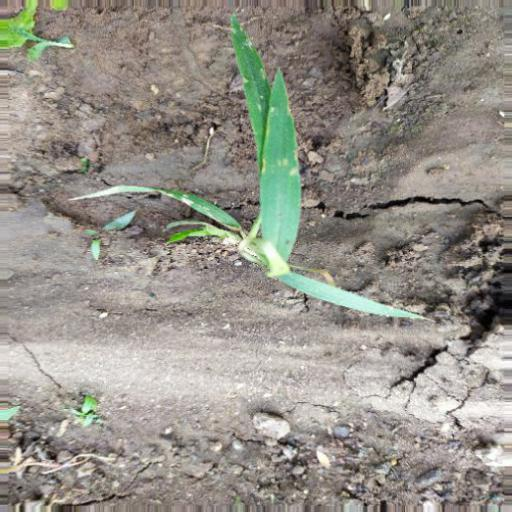

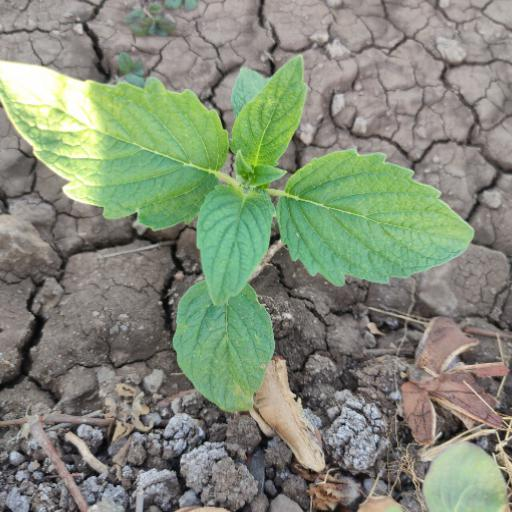

In [14]:
# prediction test
model = YOLO("runs/detect/train/weights/best.pt")

results = model(["/kaggle/input/weeds-detection/dataset/images/test/agri_0_1020.jpeg","/kaggle/input/weeds-detection/dataset/images/test/agri_0_1214.jpeg"])
#results = model(["/kaggle/input/weeds-detection/dataset/images/test/agri_0_1351.jpeg","agri_0_1214.jpeg"])
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk